In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.time_indep_algorithm as tia

# Part 1.

In [3]:
# your plots and results here

# Part 2. 

In [4]:
# your plots and results here

# Part 3. The time independent dynamics

## 3.1 Comparison with analytical linear dependence of the concertration on y

All columns are the same. 

Converged after 4067 iterations with converge error 9.994777e-06 

max turncation error: 9.729133e-03 



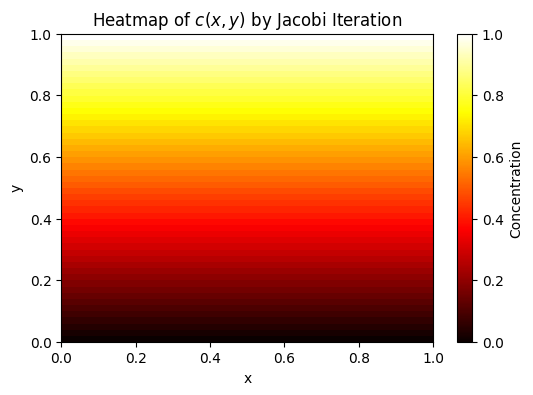

Concentration matrix results: 

clomun 0: [1.         0.97896817 0.9579389  0.93691474 0.91589823 0.89489187
 0.87389811 0.85291936 0.83195797 0.81101621 0.79009626 0.76920025
 0.74833016 0.7274879  0.70667525 0.68589387 0.6651453  0.64443093
 0.62375203 0.60310971 0.58250492 0.56193849 0.54141104 0.52092309
 0.50047495 0.48006679 0.45969861 0.43937024 0.41908136 0.39883147
 0.37861994 0.35844594 0.33830851 0.31820655 0.2981388  0.27810385
 0.25810018 0.23812611 0.21817987 0.19825956 0.17836318 0.15848861
 0.13863367 0.11879609 0.09897352 0.07916355 0.05936373 0.03957156
 0.0197845  0.        ] 

clomun 1: [1.         0.97896817 0.9579389  0.93691474 0.91589823 0.89489187
 0.87389811 0.85291936 0.83195797 0.81101621 0.79009626 0.76920025
 0.74833016 0.7274879  0.70667525 0.68589387 0.6651453  0.64443093
 0.62375203 0.60310971 0.58250492 0.56193849 0.54141104 0.52092309
 0.50047495 0.48006679 0.45969861 0.43937024 0.41908136 0.39883147
 0.37861994 0.35844594 0.33830851 0.31820655 0.2981

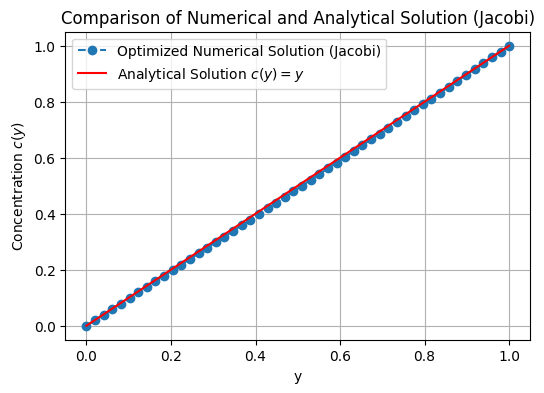

In [ ]:
# run the Jacobi iteration
optimized_concentration, iteration, delta, _ = tia.jacobi_parallel()

# check each column is the same symetrically
for i in range(1, optimized_concentration.shape[1]):
    np.allclose(optimized_concentration[:, i], optimized_concentration[:, 0])
print("All columns are the same. \n")
print(f"Converged after {iteration} iterations with converge error {delta:.6e} \n")
c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e} \n")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Jacobi Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_jacobi.png")
plt.show()

# print the concertration matrix results
print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Jacobi)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (Jacobi)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_jacobi.png")
plt.show()


Converged after 2360 iterations with converge error 9.994987e-06
max turncation error: 4.853438e-03


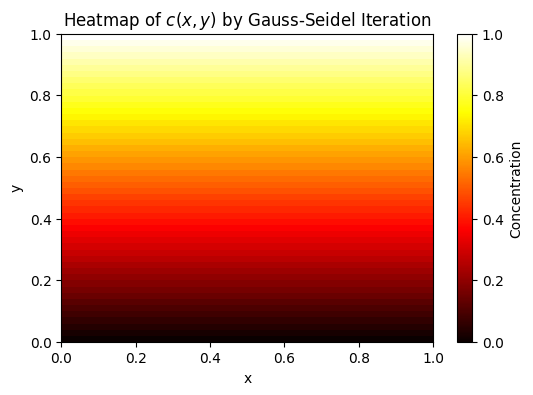

Concentration matrix results: 

clomun 0: [1.         0.97927295 0.95854787 0.93782605 0.91710877 0.8963973
 0.87569286 0.85499666 0.83430986 0.81363359 0.79296893 0.7723169
 0.75167849 0.73105461 0.71044611 0.6898538  0.66927838 0.64872051
 0.62818077 0.60765967 0.58715762 0.56667499 0.54621202 0.52576891
 0.50534575 0.48494258 0.46455933 0.44419584 0.42385191 0.40352723
 0.38322141 0.362934   0.34266446 0.32241218 0.30217649 0.28195666
 0.26175186 0.24156124 0.22138388 0.20121879 0.18106496 0.16092132
 0.14078676 0.12066014 0.10054029 0.080426   0.06031607 0.04020926
 0.02010432 0.        ] 

clomun 1: [1.         0.97927297 0.9585479  0.93782609 0.91710883 0.89639736
 0.87569294 0.85499675 0.83430996 0.8136337  0.79296905 0.77231704
 0.75167863 0.73105476 0.71044627 0.68985396 0.66927855 0.64872069
 0.62818096 0.60765986 0.58715782 0.56667518 0.54621222 0.52576911
 0.50534595 0.48494278 0.46455952 0.44419604 0.42385211 0.40352742
 0.3832216  0.36293418 0.34266463 0.32241235 0.302176

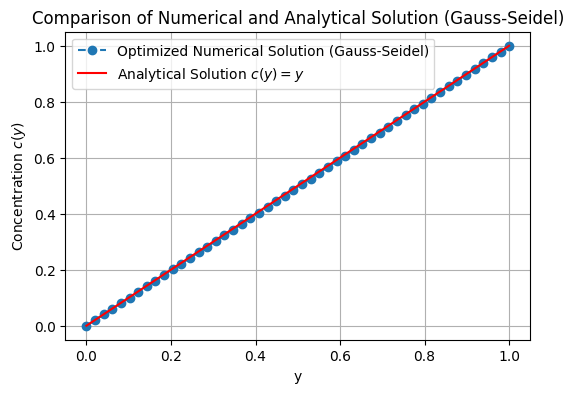

In [8]:
# run the Gauss-Seidel iteration
optimized_concentration, iteration, delta, _ = tia.gauss_seidel_seq()
print(f"Converged after {iteration} iterations with converge error {delta:.6e}")
c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Gauss-Seidel Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_gauss_seidel.png")
plt.show()

print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Gauss-Seidel)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (Gauss-Seidel)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_gauss_seidel.png")
plt.show()


Converged after 466 iterations with converge error 9.883219e-06
max turncation error: 6.620606e-04


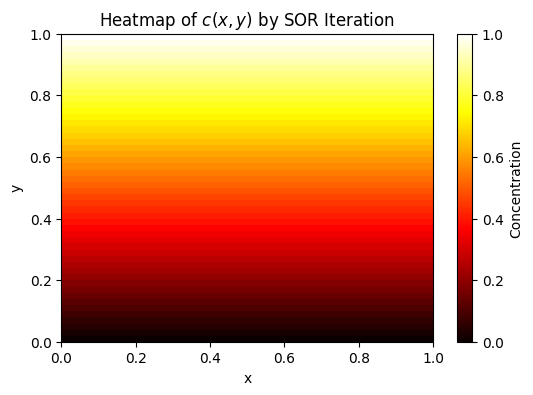

Concentration matrix results: 

clomun 0: [1.         0.97954955 0.95909865 0.93864935 0.91819871 0.89775123
 0.87730153 0.85685651 0.83640844 0.8159665  0.79552072 0.7750824
 0.75463952 0.73420533 0.71376592 0.69333627 0.67290085 0.65247611
 0.63204512 0.61162555 0.59119937 0.57078516 0.55036408 0.52995534
 0.50953958 0.4891363  0.46872598 0.4483281  0.42792325 0.40753059
 0.38713117 0.36674347 0.34634932 0.32596626 0.30557716 0.28519831
 0.26481395 0.24443884 0.22405882 0.20368691 0.18331077 0.16294145
 0.14256868 0.12220132 0.10183132 0.08146525 0.0610974  0.04073193
 0.02036557 0.        ] 

clomun 1: [1.         0.97954924 0.95909928 0.93864842 0.91819995 0.89774969
 0.87730336 0.85685439 0.83641084 0.81596383 0.79552364 0.77507923
 0.75464292 0.73420171 0.71376974 0.69333226 0.67290503 0.65247177
 0.63204959 0.61162096 0.59120406 0.57078039 0.55036891 0.52995047
 0.50954446 0.48913141 0.46873085 0.44832327 0.42792802 0.4075259
 0.38713575 0.366739   0.34635366 0.32596207 0.305581

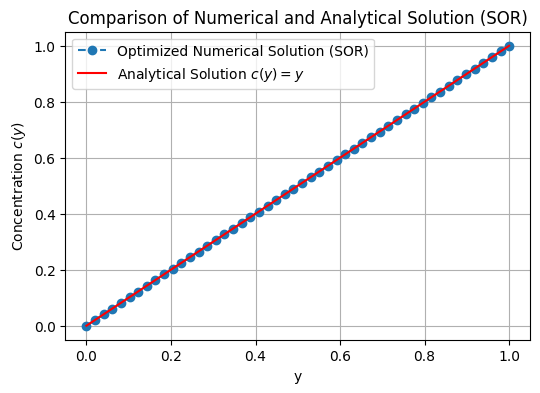

In [5]:
# run sor parallel iteration
optimized_concentration, iteration, delta, _ = tia.sor_red_black(omega=1.75)
print(f"Converged after {iteration} iterations with converge error {delta:.6e}")
c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by SOR Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_sor.png")
plt.show()

print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (SOR)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (SOR)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_sor.png")
plt.show()


## 3.2 Dependence of convergence delta on the number of iterations

3000


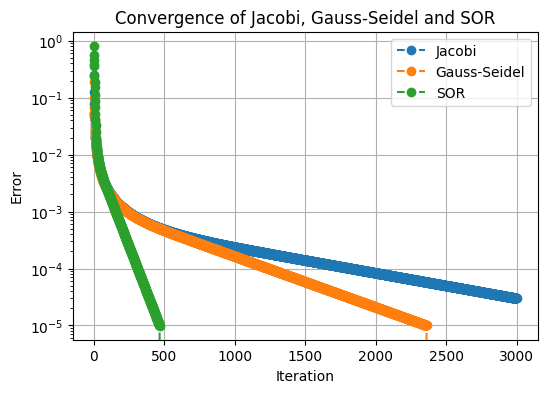

In [4]:
# plot the convergence of the Jacobi, Gauss-Seidel and SOR methods
optimized_concentration_jacbi, iteration_jacbi, delta_jacbi, delta_list_jacbi = tia.jacobi_parallel(max_iterations = 3000)
optimized_concentration_gs, iteration_gs, delta_gs, delta_list_gs = tia.gauss_seidel_wavefront(max_iterations = 3000)
optimized_concentration_sor, iteration_sor, delta_sor, delta_list_sor = tia.sor_red_black(omega=1.75, max_iterations = 3000)

print(len(delta_list_jacbi))

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(delta_list_jacbi) + 1), delta_list_jacbi, label="Jacobi", linestyle="--", marker="o")
plt.plot(np.arange(1, len(delta_list_gs)  + 1), delta_list_gs, label="Gauss-Seidel", linestyle="--", marker="o")
plt.plot(np.arange(1, len(delta_list_sor) + 1), delta_list_sor, label="SOR", linestyle="--", marker="o")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.title("Convergence of Jacobi, Gauss-Seidel and SOR")
plt.grid(True)
plt.savefig("./fig/convergence_on_iterations.png")
plt.show()


## 3.3 Dependence of optimal Omega on N

Successive Over-Relaxation (SOR) method improves the convergence of Gauss-Seidel iteration by introducing a relaxation factor $ \omega $. The optimal choice of $ \omega $ depends on the grid size $ N $. According to empirical formulas:

$$
\omega_{opt} \approx \frac{2}{1 + \sin(\frac{\pi}{N})}
$$
As $( N \to \infty )$, $ \omega_{opt} \to 2 $



In [8]:
print(np.linspace(1.7, 2.0, 15))


[1.7        1.72142857 1.74285714 1.76428571 1.78571429 1.80714286
 1.82857143 1.85       1.87142857 1.89285714 1.91428571 1.93571429
 1.95714286 1.97857143 2.        ]


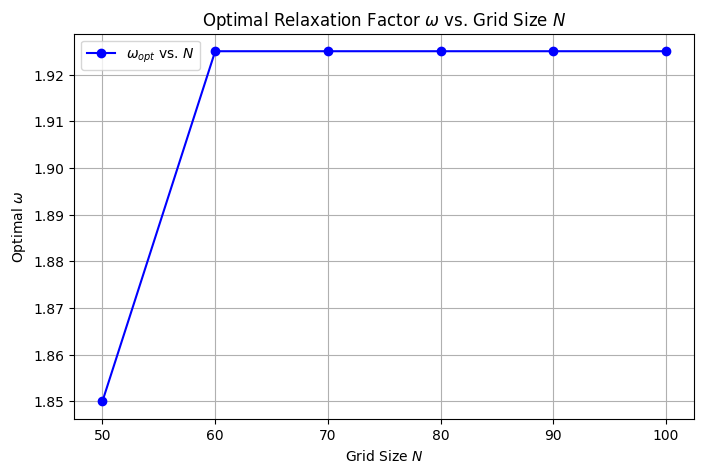

In [ ]:
# Function to run SOR with different omega values
def run_sor_experiment(N_values, omega_values, tia):
    results = []
    
    for N in N_values:
        best_iterations = float('inf')
        best_omega = None
        
        for omega in omega_values:
            _, iteration_sor, delta_sor, _ = tia.sor_wavefront(N=N, M=N, omega=omega, max_iterations=10000)
            
            if iteration_sor < best_iterations:
                best_iterations = iteration_sor
                best_omega = omega
        
        results.append((N, best_omega, best_iterations))
    
    return np.array(results)

# Define grid sizes and omega values to test
# N_values = np.arange(50, 150, 10)
N_values = [50, 60, 70, 80, 90, 100]
omega_values = np.linspace(1.7, 2.0, 5)  # Search omega in [1.7, 2.0]

# Run the experiment
results = run_sor_experiment(N_values, omega_values, tia)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(results[:, 0], results[:, 1], marker='o', linestyle='-', color='b', label="$\\omega_{opt}$ vs. $N$")
plt.xlabel("Grid Size $N$")
plt.ylabel("Optimal $\\omega$")
plt.title("Optimal Relaxation Factor $\\omega$ vs. Grid Size $N$")
plt.legend()
plt.grid()
plt.savefig("./fig/optimal_omega_vs_N.png")
plt.show()
